In [1]:
import os
thisDir = os.path.abspath(os.curdir)
os.chdir("../")

In [2]:
%matplotlib inline

In [3]:
import gpfanova, runFANOVA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Only vector data 

In [104]:
x,y,effect,labels= runFANOVA.loadData(peroxide=True,standard=True,scaleX=False,nanRemove=True,
                                               plates=['cspD1_comp'],
                                               strains=['ura3_EV','cspD1_EV','cspD1_cspD1'])

In [105]:
labels

Index([u'ura3_EV', u'cspD1_EV', u'cspD1_cspD1'], dtype='object')

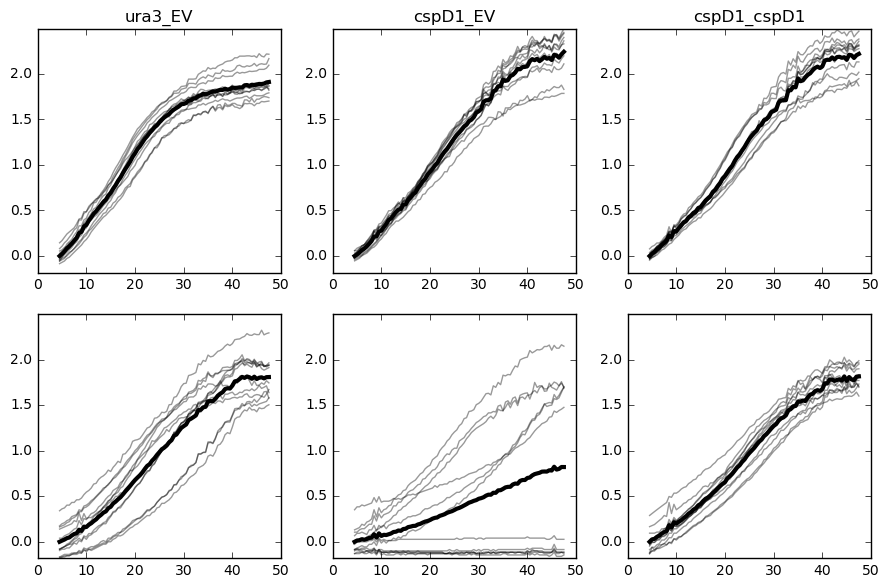

In [106]:
ncol = len(labels)

plt.figure(figsize=(3*ncol,6))
for i in range(ncol):
    for j in range(2):
        plt.subplot(2,ncol,i+j*ncol+1)
        
        if j == 0:
            plt.title(labels[i])
        
        select = (effect[:,0]==i) & (effect[:,1]==j)
        plt.plot(x,y[:,select],c='k',lw=1,alpha=.4)
        plt.plot(x,y[:,select].mean(1),c='k',lw=3)
        plt.ylim(y.min(),y.max())
        
plt.tight_layout()
plt.savefig("figures/cspD1-compliment-data.pdf",dpi=300)

In [114]:
neweffect = np.zeros((effect.shape[0],3))

#strain, condition
neweffect[:,:2] = effect

#set vector
neweffect[neweffect[:,0]>1,2] = 1

# reset full vector strain
neweffect[neweffect[:,0]>1,0] = 1

effect = neweffect

effect

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.

In [126]:
m = gpfanova.fanova.FANOVA(x,y,effect,interactions=[(0,1),(1,2)],helmertConvert=True)

In [116]:
m.sample(100,thin=10)

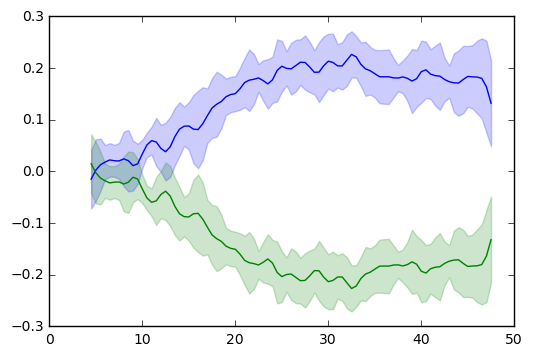

In [117]:
gpfanova.plot.plotSingleEffect(m,0,function=True)

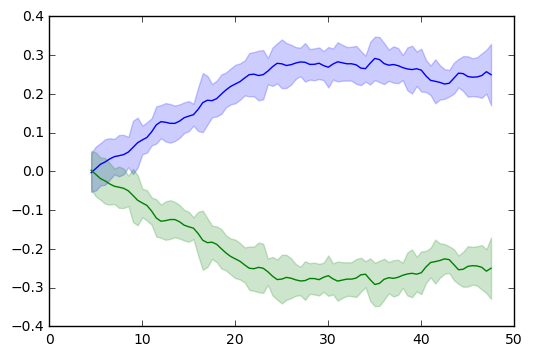

In [118]:
gpfanova.plot.plotSingleEffect(m,1,function=True)

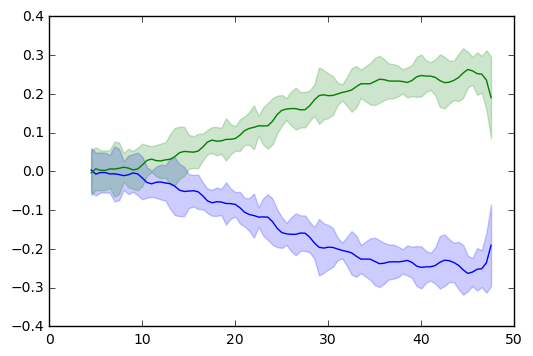

In [119]:
gpfanova.plot.plotSingleEffect(m,2,function=True)

In [120]:
samples = m.parameterSamples('gamma_1').values - m.parameterSamples('gamma_0').values
samples += m.parameterSamples('(beta,gamma)_(1,1)').values - m.parameterSamples('(beta,gamma)_(1,0)').values


gpfanova.plot.plotFunctionSamples(samples,m.x,burnin=0,intervalKwargs={"tol":1e-2})
plt.plot([m.x.min(),m.x.max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(-.5,.25)
# plt.savefig(os.path.join('figures','cspD1-compliment-mutant.pdf'),bbox_inches='tight',dpi=300)

AttributeError: 'NoneType' object has no attribute 'values'

In [ ]:
samples = m.parameterSamples('alpha_1').values - m.parameterSamples('alpha_0').values
samples += m.parameterSamples('(alpha,beta)_(1,1)').values - m.parameterSamples('(alpha,beta)_(0,1)').values
samples += m.parameterSamples('gamma_1').values - m.parameterSamples('gamma_0').values
samples += m.parameterSamples('(beta,gamma)_(1,1)').values - m.parameterSamples('(beta,gamma)_(1,0)').values


gpfanova.plot.plotFunctionSamples(samples,m.x,burnin=0,intervalKwargs={"tol":1e-2})
plt.plot([m.x.min(),m.x.max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(-.5,.25)
# plt.savefig(os.path.join('figures','cspD1-compliment-parent.pdf'),bbox_inches='tight',dpi=300)

# All data 

In [182]:
x,y,effect,labels= runFANOVA.loadData(peroxide=True,standard=True,scaleX=False,nanRemove=True,
                                               plates=['cspD1_comp','H2O2_6'],
                                               strains=['ura3_EV','cspD1_EV','cspD1_cspD1','ura3','cspD1'])

In [183]:
order = ['ura3','cspD1',u'ura3_EV', u'cspD1_EV', u'cspD1_cspD1']
index = map(lambda x: order.index(x),labels)
index

[1, 0, 2, 3, 4]

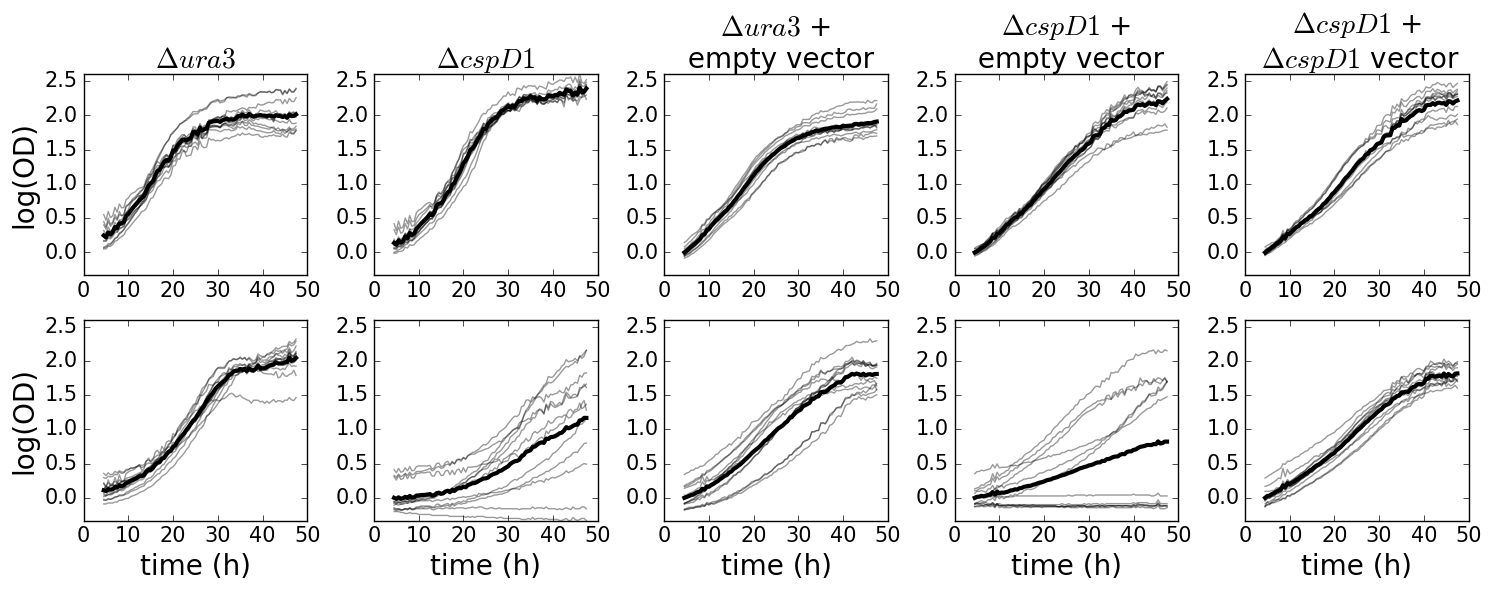

In [196]:
ncol = len(labels)

plt.figure(figsize=(3*ncol,6))
for i in range(ncol):
    for j in range(2):
        ii = index[i]
        plt.subplot(2,ncol,ii+j*ncol+1)
        
        if j == 0:
            s = labels[i]
            if 'EV' in s:
                s = s.split("_")
                plt.title("$\Delta %s$ +\n empty vector"%s[0],fontsize=20)
            elif '_' in s:
                s = s.split("_")
                plt.title("$\Delta %s$ +\n $\Delta cspD1$ vector"%s[0],fontsize=20)
            else:
                plt.title("$\Delta "+s+"$",fontsize=20)
        
        select = (effect[:,0]==i) & (effect[:,1]==j)
        plt.plot(x,y[:,select],c='k',lw=1,alpha=.4)
        plt.plot(x,y[:,select].mean(1),c='k',lw=3)
        plt.ylim(y.min(),y.max())
        
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        if j > 0:
            plt.xlabel("time (h)",fontsize=20)
        if ii == 0:
            plt.ylabel("log(OD)",fontsize=20)
        
plt.tight_layout()
plt.savefig("figures/cspD1-compliment-data-all.pdf",dpi=300)

In [155]:
# strain, condition, vector, cspD1-include
neweffect = np.zeros((effect.shape[0],4))

# strain
neweffect[np.in1d(effect[:,0],[index[1]]+index[3:]),0] = 1

# condition
neweffect[:,1] = effect[:,1]

# vector
neweffect[np.in1d(effect[:,0],index[2:]),2] = 1

# cspD1-include
neweffect[np.in1d(effect[:,0],index[4]),3] = 1

neweffect

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  

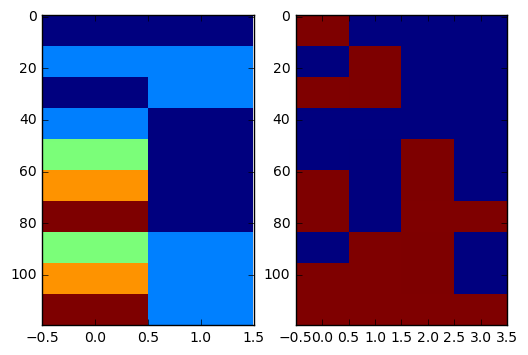

In [156]:
plt.subplot(121)
plt.imshow(effect,interpolation='none',aspect='auto')
plt.subplot(122)
plt.imshow(neweffect,interpolation='none',aspect='auto')

In [157]:
effect = neweffect

In [158]:
m = gpfanova.fanova.FANOVA(x,y,effect,interactions=[(0,1),(1,3)],helmertConvert=True)

In [168]:
m.sample(3000,thin=10)

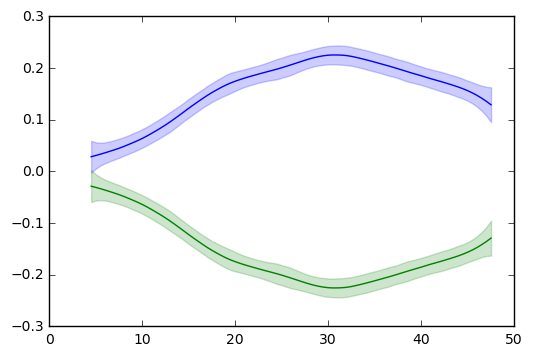

In [169]:
gpfanova.plot.plotSingleEffect(m,0,function=True)

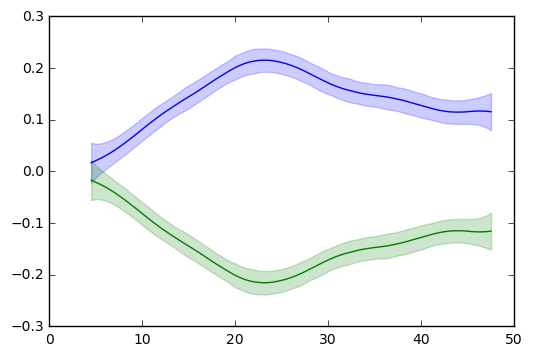

In [170]:
gpfanova.plot.plotSingleEffect(m,1,function=True)

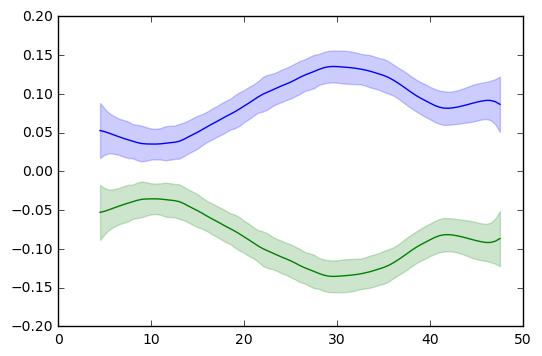

In [171]:
gpfanova.plot.plotSingleEffect(m,2,function=True)

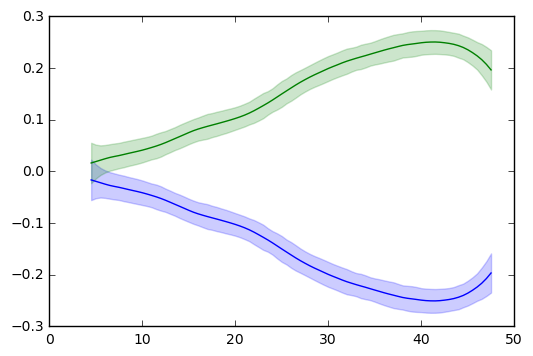

In [172]:
gpfanova.plot.plotSingleEffect(m,3,function=True)

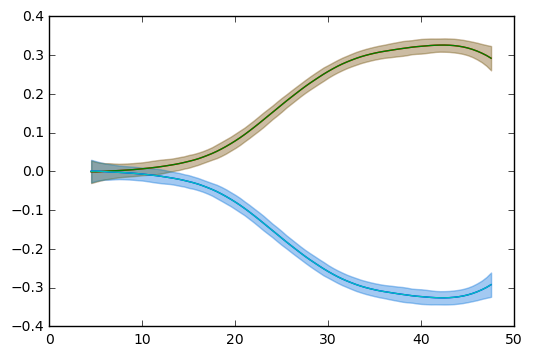

In [173]:
gpfanova.plot.plotInteraction(m,0,1,function=True)

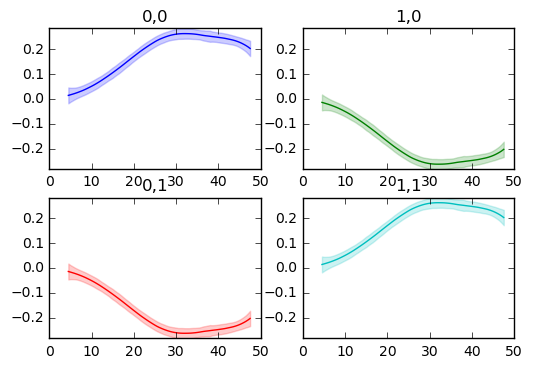

In [174]:
gpfanova.plot.plotInteraction(m,1,3,function=True,subplots=(2,2))

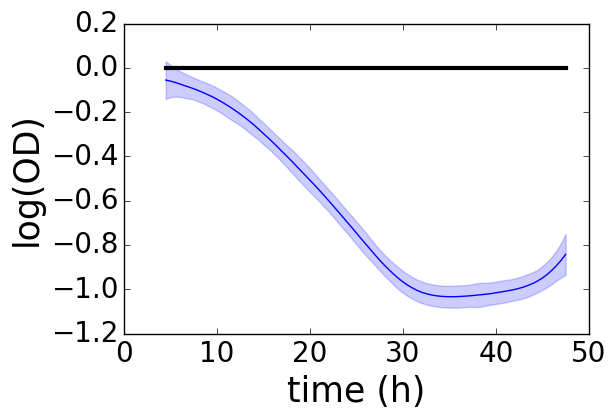

In [177]:
samples = m.parameterSamples('alpha_1').values - m.parameterSamples('alpha_0').values
samples += m.parameterSamples('(alpha,beta)_(1,1)').values - m.parameterSamples('(alpha,beta)_(0,1)').values

gpfanova.plot.plotFunctionSamples(samples,m.x,burnin=0,intervalKwargs={"tol":1e-2})
plt.plot([m.x.min(),m.x.max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(-.5,.25)
plt.savefig(os.path.join('figures','cspD1-compliment-mutant.pdf'),bbox_inches='tight',dpi=300)

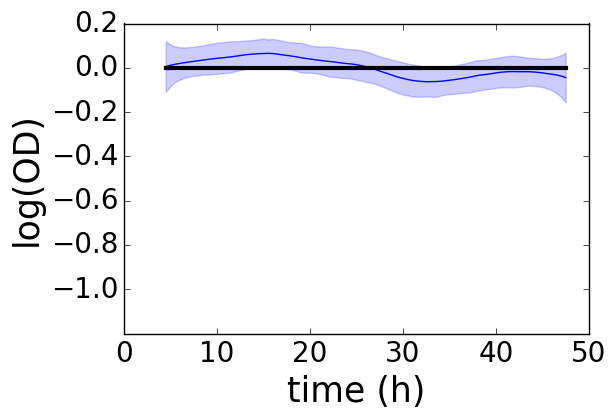

In [179]:
samples = m.parameterSamples('alpha_1').values - m.parameterSamples('alpha_0').values
samples += m.parameterSamples('(alpha,beta)_(1,1)').values - m.parameterSamples('(alpha,beta)_(0,1)').values
samples += m.parameterSamples('delta_1').values - m.parameterSamples('delta_0').values
samples += m.parameterSamples('(beta,delta)_(1,1)').values - m.parameterSamples('(beta,delta)_(1,0)').values


gpfanova.plot.plotFunctionSamples(samples,m.x,burnin=0,intervalKwargs={"tol":1e-2})
plt.plot([m.x.min(),m.x.max()],[0,0],'k',lw=3)

plt.xlabel("time (h)",fontsize=25)
plt.ylabel("log(OD)",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(-.5,.25)
plt.ylim(-1.2,.2)
plt.savefig(os.path.join('figures','cspD1-compliment-parent.pdf'),bbox_inches='tight',dpi=300)

In [197]:
m.save("results/cspd1-compliment.csv")